**This notebook presents the results of the model one**
 - Model performances
 - Best model and its hyper parameters
 - Testing the model performances

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

In [2]:
base_url = !pwd
base_url = base_url[0]
result_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'Models', 'Models_records.csv'))
result_path

'/home/romainj/code/RomainJupille/wagon/Projet_batteries/BatteryProject/BatteryProject/ModelTwo/Models/Models_records.csv'

## Results summary

### Results table

In [18]:
results_df = pd.read_csv(result_path).drop(columns = ['Unnamed: 0']).iloc[-4:,:]
results_df

,Try_ID,deep,offset,Features_disc_capa,Features_dis_ener,Features_char_capa,Features_eff_ener,Features_char_ener,Features_dc_res,Features_temp_avg,...,Metrics_train_eval,Metrics_validation_eval,Metrics_test_eval,Metrics_training_time,Metrics_epochs,HyperParams_unit_type,HyperParams_n_units,HyperParams_n_layer,HyperParams_dropout_rate,HyperParams_dropout_layer
255,256,40,40,X,X,X,NaN,NaN,NaN,NaN,...,235.300064,186.466125,189.887466,348.231319,171,LSTM,4,2,0.2,True
256,257,40,40,X,X,X,NaN,NaN,NaN,NaN,...,241.858353,187.426208,183.860794,426.599052,141,LSTM,4,3,0.2,True
257,258,40,40,X,X,X,X,X,X,X,...,120.450043,123.133530,195.447876,313.222115,153,LSTM,4,2,0.2,True
258,259,40,40,X,X,X,X,X,X,X,...,169.807037,131.480759,189.121155,410.969514,130,LSTM,4,3,0.2,True


### Results curve

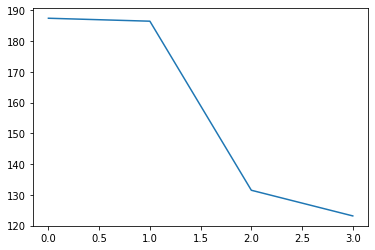

In [19]:
plt.plot(results_df['Metrics_validation_eval'].sort_values(ascending = False).values)

## The top 3 models

### Top 1 model

In [46]:
best_model_1 = results_df.sort_values(by='Metrics_validation_eval', ascending = True).iloc[0,:]
best_model_1

Try_ID                              258
deep                                 40
offset                               40
Features_disc_capa                    X
Features_dis_ener                     X
Features_char_capa                    X
Features_eff_ener                     X
Features_char_ener                    X
Features_dc_res                       X
Features_temp_avg                     X
Features_temp_min                     X
Features_temp_max                     X
Metrics_baseline              321.28148
Metrics_train_eval           120.450043
Metrics_validation_eval       123.13353
Metrics_test_eval            195.447876
Metrics_training_time        313.222115
Metrics_epochs                      153
HyperParams_unit_type              LSTM
HyperParams_n_units                   4
HyperParams_n_layer                   2
HyperParams_dropout_rate            0.2
HyperParams_dropout_layer          True
Name: 257, dtype: object

### Top 2 model

In [47]:
best_model_2 = results_df.sort_values(by='Metrics_validation_eval', ascending = True).iloc[1,:]
best_model_2

Try_ID                              259
deep                                 40
offset                               40
Features_disc_capa                    X
Features_dis_ener                     X
Features_char_capa                    X
Features_eff_ener                     X
Features_char_ener                    X
Features_dc_res                       X
Features_temp_avg                     X
Features_temp_min                     X
Features_temp_max                     X
Metrics_baseline              321.28148
Metrics_train_eval           169.807037
Metrics_validation_eval      131.480759
Metrics_test_eval            189.121155
Metrics_training_time        410.969514
Metrics_epochs                      130
HyperParams_unit_type              LSTM
HyperParams_n_units                   4
HyperParams_n_layer                   3
HyperParams_dropout_rate            0.2
HyperParams_dropout_layer          True
Name: 258, dtype: object

### Top 3 model

In [48]:
best_model_3 = results_df.sort_values(by='Metrics_validation_eval', ascending = True).iloc[2,:]
best_model_3

Try_ID                              256
deep                                 40
offset                               40
Features_disc_capa                    X
Features_dis_ener                     X
Features_char_capa                    X
Features_eff_ener                   NaN
Features_char_ener                  NaN
Features_dc_res                     NaN
Features_temp_avg                   NaN
Features_temp_min                   NaN
Features_temp_max                   NaN
Metrics_baseline              321.28148
Metrics_train_eval           235.300064
Metrics_validation_eval      186.466125
Metrics_test_eval            189.887466
Metrics_training_time        348.231319
Metrics_epochs                      171
HyperParams_unit_type              LSTM
HyperParams_n_units                   4
HyperParams_n_layer                   2
HyperParams_dropout_rate            0.2
HyperParams_dropout_layer          True
Name: 255, dtype: object

## Test of the best model

### Test of random samples

In [49]:
best_model = results_df.sort_values(by='Metrics_validation_eval', ascending = True).iloc[0,:]

model_id = str(best_model['Try_ID'])
for i in range(4-len(model_id)):
    model_id = ''.join(['0',model_id])
model_id

'0258'

In [24]:
base_url = !pwd
base_url = base_url[0]

raw_data_path = os.path.normpath(os.path.join(base_url, '..', '..', 'TransformedData', 'summary_discharge_capacity.csv'))

bc_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'data', f"bc_{model_id}.csv"))

X_test_scaled_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'data', f"X_test_scaled_{model_id}.csv"))
X_test_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'data', f"X_test_{model_id}.csv"))

y_test_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'data' , f"y_test_{model_id}.csv"))
model_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'Models' , f"model_{model_id}.joblib"))

In [60]:
deep = best_model['deep']
n_feature = np.count_nonzero(best_model.values == 'X') + 1

df_raw_data = pd.read_csv(raw_data_path)
df_barcode = pd.read_csv(bc_path, header = None)
X_test = np.genfromtxt(X_test_path, delimiter = ',')
X_test = X_test.reshape(df_X_test.shape[0],deep,n_feature)

model = joblib.load(model_path)
y_test =  pd.read_csv(y_test_path, header = None)

predictions = model.predict(X_test)

Random number of the tested sample: 321
Barcode of the sample: el150800737274
Prediction of life-cycles left: 247
True number of life-cycles left: 67
Model error: 180


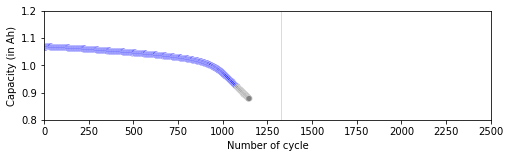

In [88]:
n_features = 4
deep = 40

n = np.random.randint(0,X_test.shape[0])
y_pred = int(predictions[n,:])
y_true = int(y_test.iloc[n,0])
barcode = df_barcode.iloc[n,0]
last_cycle = int(X_test[n,-1,-1])

print(f'Random number of the tested sample: {n}')
print(f'Barcode of the sample: {barcode}')
print(f'Prediction of life-cycles left: {y_pred}')
print(f'True number of life-cycles left: {y_true}')
print(f'Model error: {abs(y_true-y_pred)}')

fig, axs = plt.subplots(figsize=(8,2))

data = df_raw_data[df_raw_data['barcode'] == barcode]
sns.scatterplot(y = data.iloc[0,1:last_cycle+1].fillna(0), x =np.arange(0,last_cycle,1), ax = axs, color = 'blue', alpha = 0.5)
sns.scatterplot(y = data.iloc[0,1+last_cycle:].fillna(0), x =np.arange(last_cycle,3000,1), ax = axs, color = 'grey', alpha = 0.5)
sns.lineplot(y = [0.8, 1.2], x = [last_cycle+y_pred,last_cycle+y_pred],color = 'red')
axs.set_ylim(0.8,1.2)
axs.set_yticks([0.8,0.9,1.0,1.1,1.2])
axs.set_xlim(0,2500)
axs.set_xticks(range(0,2501,250))
axs.set_ylabel('Capacity (in Ah)')
axs.set_xlabel('Number of cycle')
axs.tick_params(axis='both', which='major', labelsize=10)

### Global performance of the model